🧰 Step 1 – Install & Import

In [1]:
# Colab setup
!pip install yfinance pandas matplotlib --quiet


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


⚙️ Step 2 – Fetch Stock History

In [3]:
def fetch_stock_history(ticker: str, days: int = 60) -> pd.DataFrame:
    """
    Fetch last N days of OHLCV data for a given Indian stock (e.g. 'RELIANCE.NS')
    """
    end = datetime.now()
    start = end - timedelta(days=days)
    df = yf.download(ticker, start=start, end=end, progress=False)

    if df.empty:
        raise ValueError(f"No data found for {ticker}")

    df.reset_index(inplace=True)
    df['Daily Change %'] = df['Close'].pct_change() * 100
    return df


📊 Step 3 – Plot and Summarize

In [7]:
def plot_stock(df: pd.DataFrame, ticker: str):
    plt.figure(figsize=(10,5))
    plt.plot(df['Date'], df['Close'], label=f'{ticker} Closing Price', linewidth=2)
    plt.title(f'{ticker} – Last {len(df)} Days')
    plt.xlabel('Date')
    plt.ylabel('Close Price (₹)')
    plt.grid(True)
    plt.legend()
    plt.show()

def stock_summary(df: pd.DataFrame):
    last_close = df['Close'].iloc[-1].item()

    # Ensure there's enough data for 7-day and 30-day calculations
    change_7d = float('nan')
    if len(df) >= 7:
        close_7d_ago = df['Close'].iloc[-7].item()
        change_7d = (last_close - close_7d_ago) / close_7d_ago * 100

    change_30d = float('nan')
    if len(df) >= 30:
        close_30d_ago = df['Close'].iloc[-30].item()
        change_30d = (last_close - close_30d_ago) / close_30d_ago * 100

    print(f"📈 Latest Close: ₹{last_close:.2f}")
    if not pd.isna(change_7d):
        print(f"7-Day Change: {change_7d:+.2f}%")
    else:
        print("7-Day Change: Not enough data")
    if not pd.isna(change_30d):
        print(f"30-Day Change: {change_30d:+.2f}%")
    else:
        print("30-Day Change: Not enough data")

🚀 Step 4 – Test with Real Ticker

/tmp/ipython-input-611704515.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)


📈 Latest Close: ₹1478.00
7-Day Change: -0.71%
30-Day Change: +7.69%


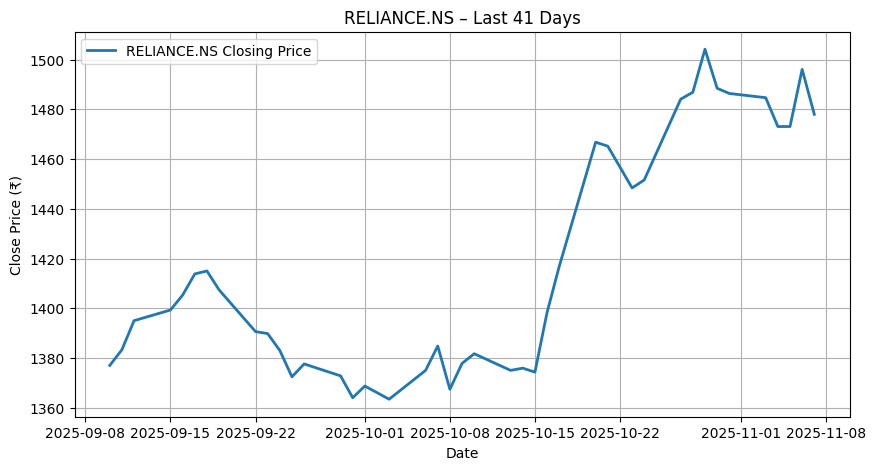

Price,Date,Close,High,Low,Open,Volume,Daily Change %
Ticker,,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,
36,2025-11-03,1484.699951,1495.000000,1479.300049,1486.000000,8452085,-0.114375
37,2025-11-04,1473.099976,1492.800049,1470.099976,1483.900024,10007806,-0.781301
38,2025-11-05,1473.099976,1473.099976,1473.099976,1473.099976,0,0.000000
39,2025-11-06,1496.099976,1501.599976,1476.199951,1484.000000,16772678,1.561333
40,2025-11-07,1478.000000,1498.400024,1475.900024,1494.599976,7821765,-1.209811


In [8]:
ticker = "RELIANCE.NS"   # You can also try "TCS.NS", "INFY.NS"
df = fetch_stock_history(ticker, days=60)

stock_summary(df)
plot_stock(df, ticker)

df.tail()   # inspect the data


🧩 Step 5 – Prepare for Next Modules

In [9]:
# Save clean dataset for later ML + LLM analysis
df.to_csv(f"{ticker}_data.csv", index=False)
print("Data saved → ready for predictor and LLM modules.")


Data saved → ready for predictor and LLM modules.
